<a href="https://colab.research.google.com/github/carvalheirafc/deep_learning_stuff/blob/master/statistical_analysis/diabetes/diabetes_pca_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA


In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.describe()


,A,B,C,D,E,F,G,J,M,Diagnóstico
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,70.178819,120.894531,69.105469,20.536458,79.799479,31.992578,0.472266,33.240885,1.348958
std,3.369578,15.006546,31.972618,19.355807,15.952218,115.244002,7.884160,0.332348,11.760232,0.476951
min,0.000000,22.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,1.000000
25%,1.000000,60.666667,99.000000,62.000000,0.000000,0.000000,27.300000,0.200000,24.000000,1.000000
50%,3.000000,69.666667,117.000000,72.000000,23.000000,30.500000,32.000000,0.400000,29.000000,1.000000
75%,6.000000,79.666667,140.250000,80.000000,32.000000,127.250000,36.600000,0.600000,41.000000,2.000000
max,17.000000,122.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.400000,81.000000,2.000000


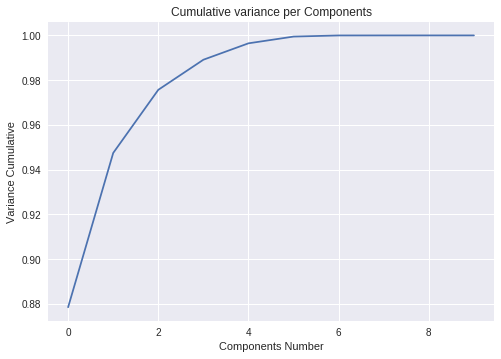

In [3]:
pca = PCA()
pca.fit(diabetes)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components Number')
plt.ylabel('Variance Cumulative')
plt.title('Cumulative variance per Components')
plt.show()

In [17]:
# Principal component Analysis
# We can use only two components to conver more than 99% of the variance values or
# Use 6 to reach up to 99.99999% of the values. 


pca = PCA(n_components = 4)

x = diabetes.loc[:, diabetes.columns !='Diagnóstico'].values
x = StandardScaler().fit_transform(x)

y = diabetes.loc[:, 'Diagnóstico'].values
y = MinMaxScaler().fit_transform(np.reshape(y, (-1, 2)))


principalComponents = pca.fit_transform(x)


diag = pd.DataFrame(data=y.flatten(), columns=['Diagnóstico'])
diabetes_principal_components= pd.DataFrame(data = principalComponents, columns=
                                           ['Component 1', 
                                            'Component 2', 
                                            'Component 3', 
                                            'Component 4'])


diabetes_principal_components = pd.concat([diabetes_principal_components, 
                                           diag], axis = 1)
diabetes_principal_components.head()


,Component 1,Component 2,Component 3,Component 4,Diagnóstico
0,-1.492449,1.158003,0.037126,0.454803,1.0
1,1.338962,-0.658312,-0.645993,0.215662,0.0
2,-0.367063,1.654389,1.838544,-0.529876,1.0
3,1.371286,-1.183519,-0.590384,-0.549141,0.0
4,-1.580676,-2.442761,2.800872,4.125987,1.0


In [0]:
diabetes_principal_components.to_csv('diabetes_pca_result.csv', index=False)